#  NECESSARY  IMPORT

In [ ]:

import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.metrics import confusion_matrix
import sys
import os
from google.colab import widgets
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# **1. Data Visualization**

In [ ]:
audio = "/content/drive/MyDrive/IT890/RAVDESS/audio_speech_actors_01-24/"

In [ ]:
emotions = ['Neutral', 'Calm', 'Happy', 'Sad', 'Angry', 'Fearful', 'Disgust', 'Surprise']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

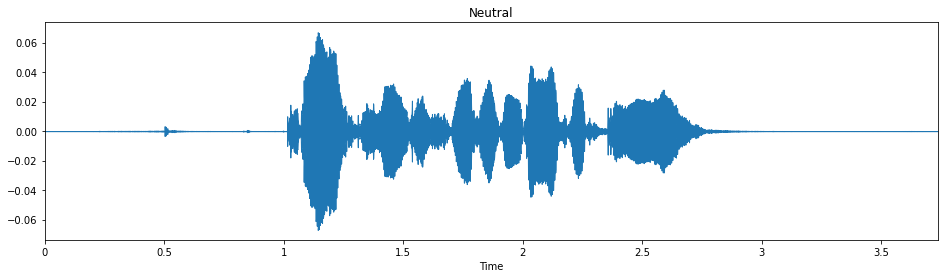

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

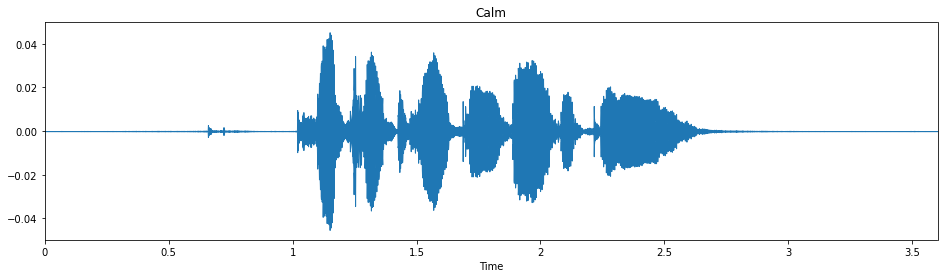

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

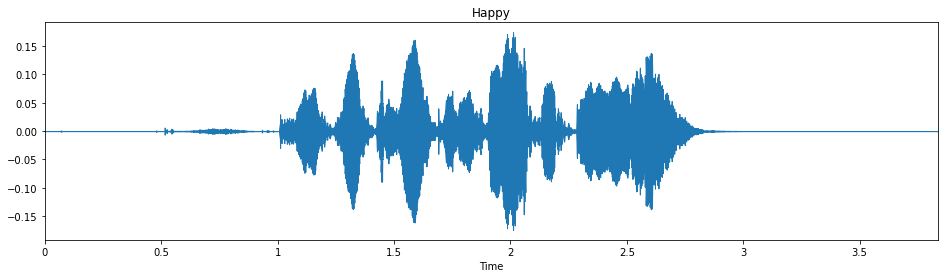

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

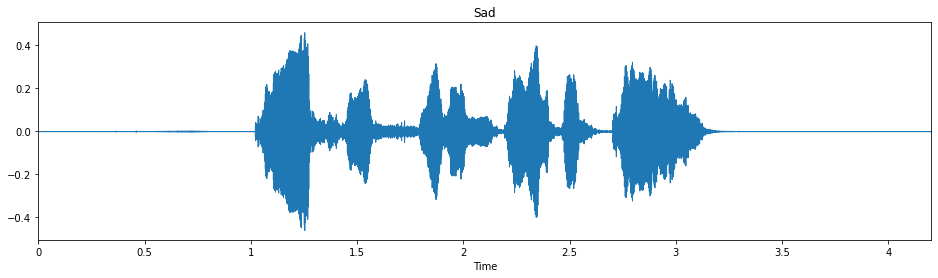

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

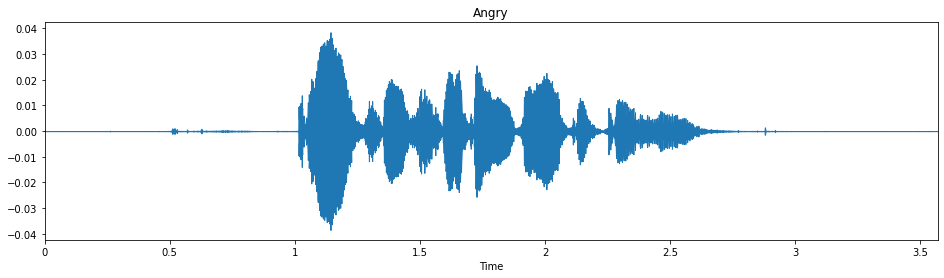

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

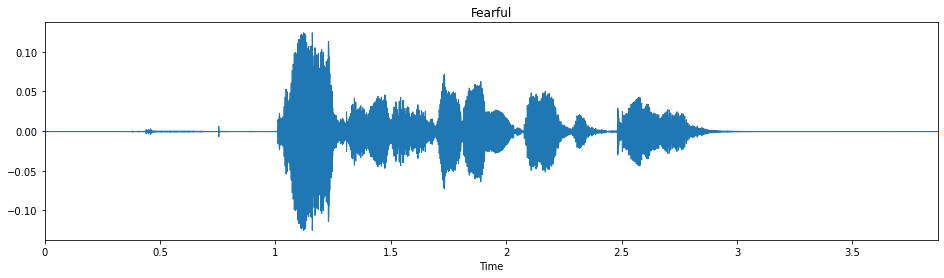

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

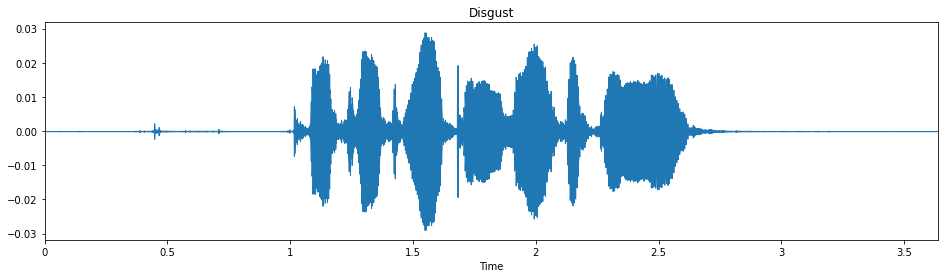

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

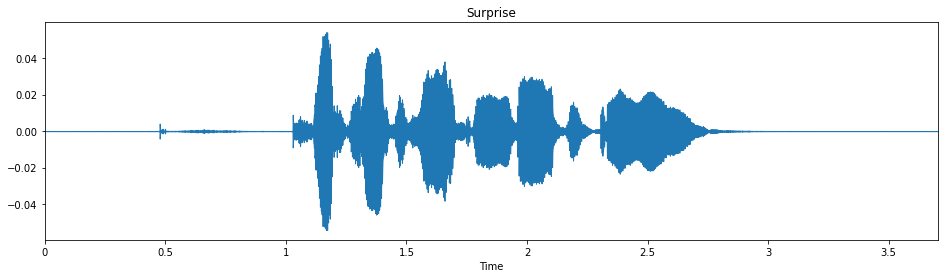

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

IndexError: ignored

In [ ]:


t = widgets.TabBar(['Neutral', 'Calm', 'Happy', 'Sad', 'Angry', 'Fearful', 'Disgust', 'Surprise'])

x = [0] * 9
sr = [0] * 9
i=0
j=-1
for root, dirs, files in os.walk(audio):
    for name in files:
        i, j = i + 1, j + 1
        filename = os.path.join(root, name)
        with t.output_to(j):
            x[i] , sr[i] = librosa.load(filename)
        plt.figure(figsize=(16, 4))
        plt.title(emotions[j])
        librosa.display.waveplot(x[i], sr=sr[i])

---------------------------------------------------

## 1.1 Male Neutral

In [ ]:
# LOAD IN FILE
x, sr= librosa.load('/content/drive/MyDrive/IT890/RAVDESS/Actor_01/03-01-01-01-01-01-01.wav')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


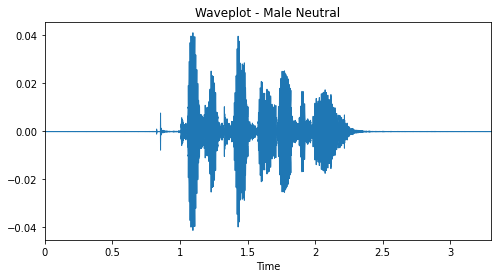

In [ ]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Neutral')
plt.savefig('Waveplot_MaleNeutral.png')

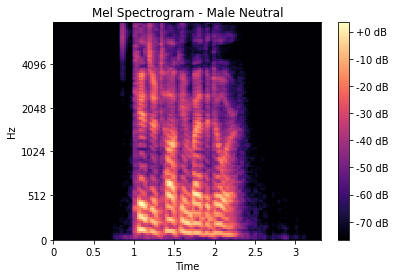

In [ ]:
# CREATE  SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Neutral')
plt.savefig('MelSpec_MaleNeutral.png')
plt.colorbar(format='%+2.0f dB');

## 1.2 Female Calm

In [ ]:
# LOAD IN FILE
x, sr = librosa.load('/content/drive/MyDrive/IT890/RAVDESS/Actor_02/03-01-02-01-01-01-02.wav')

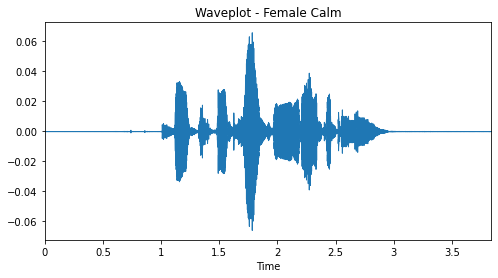

In [ ]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Calm')
plt.savefig('Waveplot_FemaleCalm.png')


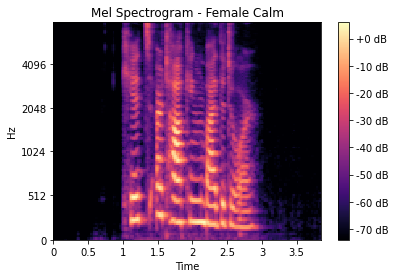

In [ ]:
# CREATE SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Calm')
plt.savefig('MelSpec_FemaleCalm.png')
plt.colorbar(format='%+2.0f dB');

## 1.3 Male Happy

In [ ]:
# LOAD FILE
x, sr = librosa.load('/content/drive/MyDrive/IT890/RAVDESS/Actor_03/03-01-03-01-01-01-03.wav')

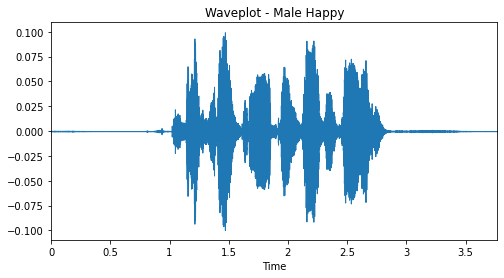

In [ ]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Happy')
plt.savefig('Waveplot_MaleHappy.png')

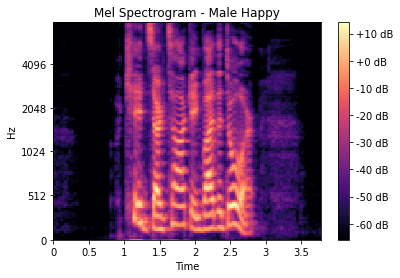

In [ ]:
# CREATE SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
x = librosa.power_to_db(x)

librosa.display.specshow(x, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Happy')
plt.savefig('MelSpec_MaleHappy.png')
plt.colorbar(format='%+2.0f dB');

## 1.4 Female Sad

In [ ]:
# LOAD FILE
x, sr = librosa.load('/content/drive/MyDrive/IT890/RAVDESS/Actor_04/03-01-04-01-01-01-04.wav')


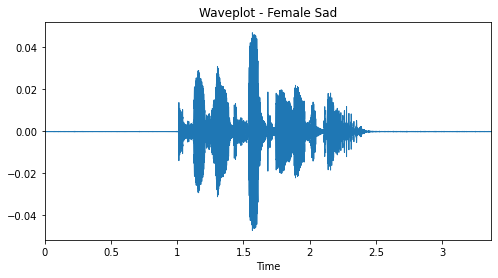

In [ ]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Sad')
plt.savefig('Waveplot_FemaleSad.png')

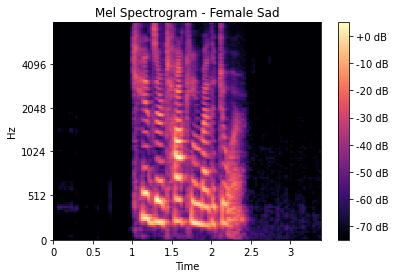

In [ ]:
# DISPLAY SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Sad');
plt.savefig('MelSpec_FemaleSad.png')
plt.colorbar(format='%+2.0f dB');

## 1.5 Male Angry

In [ ]:
# LOAD FILE
x, sr = librosa.load('/content/drive/MyDrive/IT890/RAVDESS/Actor_05/03-01-05-01-01-01-05.wav')


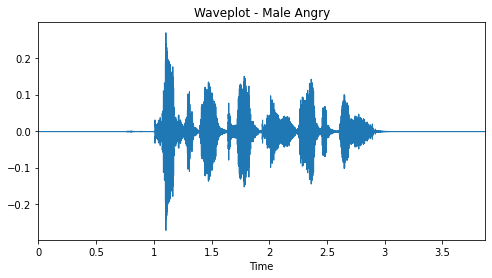

In [ ]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Angry')
plt.savefig('Waveplot_MaleAngry.png')

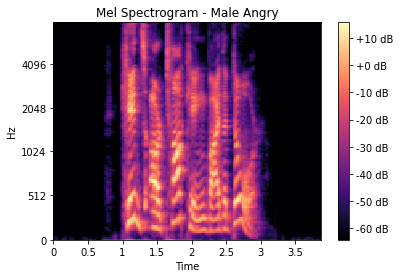

In [ ]:
# DISPLAY SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Angry');
plt.savefig('MelSpec_MaleAngry.png')
plt.colorbar(format='%+2.0f dB');

## 1.6 Female Fearful

In [ ]:
# LOAD FILE
x, sr = librosa.load('/content/drive/MyDrive/IT890/RAVDESS/Actor_06/03-01-06-01-01-01-06.wav')

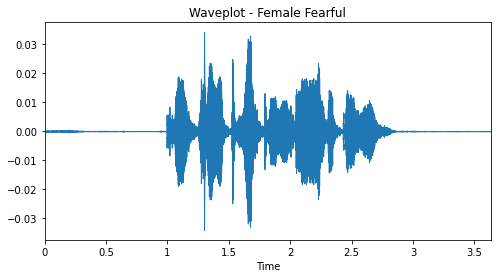

In [ ]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Fearful')
plt.savefig('Waveplot_FemaleFearful.png')


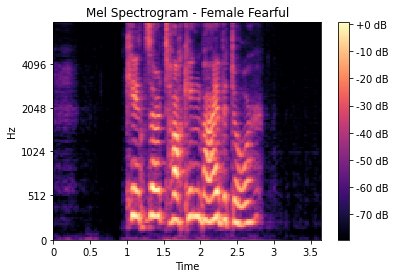

In [ ]:
# DISPLAY SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Fearful')
plt.savefig('MelSpec_FemaleFearful.png')
plt.colorbar(format='%+2.0f dB');

## 1.7 Male Disgust

In [ ]:
# LOAD FILE
x, sr = librosa.load('/content/drive/MyDrive/IT890/RAVDESS/Actor_07/03-01-07-01-01-01-07.wav')



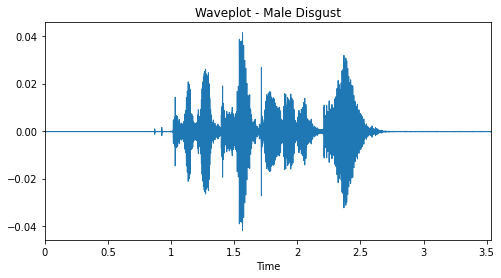

In [ ]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Disgust')
plt.savefig('Waveplot_MaleDisgust.png')


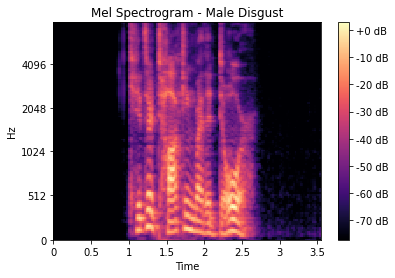

In [ ]:
# DISPLAY SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Disgust')
plt.savefig('MelSpec_MaleDisgust.png')
plt.colorbar(format='%+2.0f dB');

## 1.8 Female Surprised

In [ ]:
# LOAD FILE
x, sr = librosa.load('/content/drive/MyDrive/IT890/RAVDESS/Actor_08/03-01-08-01-01-01-08.wav')

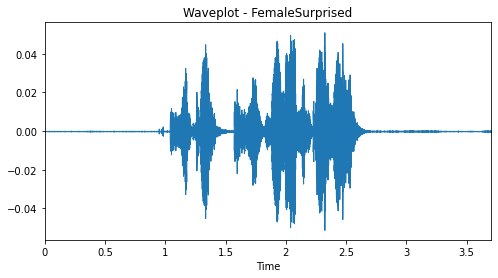

In [ ]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - FemaleSurprised')
plt.savefig('Waveplot_FemaleSurprised.png')


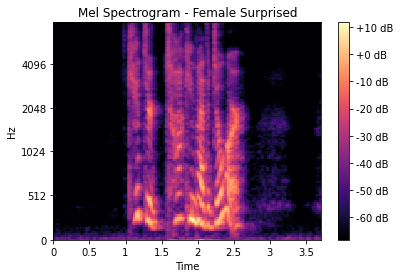

In [ ]:
# DISPLAY SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Surprised')
plt.savefig('MelSpec_FemaleSurprised.png')
plt.colorbar(format='%+2.0f dB');

# **2. Data Pre-processing**

## Labeling Audio Files

In [ ]:
# CREATE DIRECTORY OF AUDIO FILES 
audio = "/content/drive/MyDrive/IT890/RAVDESS/audio_speech_actors_01-24/"
actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort() 
actor_folders[0:24]

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [ ]:
# CREATE FUNCTION TO EXTRACT EMOTION NUMBER, ACTOR AND GENDER LABEL
emotion = []
gender = []
actor = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)

In [ ]:
# PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df

,gender,emotion,actor,path
0,male,happy,1,/content/drive/MyDrive/IT890/RAVDESS/audio_spe...
1,male,fear,1,/content/drive/MyDrive/IT890/RAVDESS/audio_spe...
2,male,angry,1,/content/drive/MyDrive/IT890/RAVDESS/audio_spe...
3,male,sad,1,/content/drive/MyDrive/IT890/RAVDESS/audio_spe...
4,male,fear,1,/content/drive/MyDrive/IT890/RAVDESS/audio_spe...
...,...,...,...,...
1435,female,surprise,24,/content/drive/MyDrive/IT890/RAVDESS/audio_spe...
1436,female,surprise,24,/content/drive/MyDrive/IT890/RAVDESS/audio_spe...
1437,female,disgust,24,/content/drive/MyDrive/IT890/RAVDESS/audio_spe...
1438,female,disgust,24,/content/drive/MyDrive/IT890/RAVDESS/audio_spe...


In [ ]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', -1)

audio_df.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,gender,emotion,actor,path
544,female,happy,10,/content/drive/MyDrive/IT890/RAVDESS/audio_speech_actors_01-24/Actor_10/03-01-03-02-02-01-10.wav
1198,female,angry,20,/content/drive/MyDrive/IT890/RAVDESS/audio_speech_actors_01-24/Actor_20/03-01-05-01-01-02-20.wav
47,male,disgust,1,/content/drive/MyDrive/IT890/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-07-01-02-01-01.wav
1145,female,happy,20,/content/drive/MyDrive/IT890/RAVDESS/audio_speech_actors_01-24/Actor_20/03-01-03-01-01-01-20.wav
379,male,angry,7,/content/drive/MyDrive/IT890/RAVDESS/audio_speech_actors_01-24/Actor_07/03-01-05-02-01-01-07.wav
180,female,calm,4,/content/drive/MyDrive/IT890/RAVDESS/audio_speech_actors_01-24/Actor_04/03-01-02-01-01-02-04.wav
251,male,calm,5,/content/drive/MyDrive/IT890/RAVDESS/audio_speech_actors_01-24/Actor_05/03-01-02-01-01-01-05.wav
232,female,surprise,4,/content/drive/MyDrive/IT890/RAVDESS/audio_speech_actors_01-24/Actor_04/03-01-08-02-01-02-04.wav
186,female,happy,4,/content/drive/MyDrive/IT890/RAVDESS/audio_speech_actors_01-24/Actor_04/03-01-03-01-02-02-04.wav
633,male,happy,11,/content/drive/MyDrive/IT890/RAVDESS/audio_speech_actors_01-24/Actor_11/03-01-03-02-01-01-11.wav


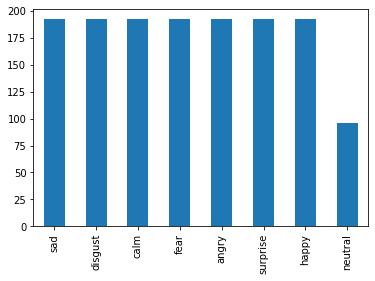

In [ ]:
# LOOK AT DISTRIBUTION OF CLASSES
audio_df.emotion.value_counts().plot(kind='bar')

In [ ]:
# EXPORT TO CSV
audio_df.to_csv('/content/drive/MyDrive/IT890/RAVDESS/Uploads/audio.csv')

#  **3. Feature Extraction**

In [ ]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING 
df = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    
    
        
    # Mel-frequency cepstral coefficients (MFCCs)
    mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
    mfcc=np.mean(mfcc,axis=0)
    

    
    df.loc[counter] = [log_spectrogram]
    counter=counter+1   

print(len(df))
df.head()

1440


,mel_spectrogram
0,"[-62.170956, -61.81866, -60.88577, -60.982903, -60.88945, -60.281708, -59.37703, -58.542164, -58.047844, -57.288044, -56.319824, -55.848885, -55.92625, -55.651943, -54.77989, -53.988358, -54.35027, -53.63127, -53.103985, -53.1228, -53.95315, -54.429558, -55.415855, -56.07823, -56.26308, -56.658295, -57.662132, -58.40043, -58.731968, -59.61697, -60.451366, -60.952396, -61.746746, -61.639263, -60.79034, -59.637012, -59.185585, -60.140568, -61.63167, -60.02678, -58.43475, -60.042805, -41.89772, -30.702482, -24.658596, -23.204521, -22.630867, -23.367182, -25.136667, -26.829569, -28.208813, -28.704477, -29.473024, -31.004452, -32.763695, -33.835503, -34.427227, -34.494556, -33.278366, -31.611914, -30.865816, -29.57372, -26.95624, -25.783533, -26.248594, -27.20367, -29.499376, -34.157803, -38.045204, -39.740555, -41.32439, -35.608856, -28.914366, -27.2514, -28.61517, -28.636059, -29.668625, -31.017204, -32.13098, -33.45695, -33.96665, -33.451168, -31.934114, -31.128843, -28.517105, -28.629288, -31.848272, -35.881912, -38.850216, -38.78787, -34.238712, -29.379, -26.393417, -25.722115, -24.566559, -24.362883, -24.472692, -25.01439, -26.057304, -27.800035, ...]"
1,"[-69.92284, -69.9707, -69.9707, -69.91969, -69.68537, -69.40624, -69.04999, -69.162704, -69.68784, -69.82855, -69.86694, -69.65353, -69.86028, -69.95474, -69.9705, -69.96657, -69.92767, -69.784546, -69.80476, -69.61833, -69.89993, -69.9322, -69.80854, -69.65079, -69.11319, -68.91183, -68.87334, -68.709076, -68.337296, -68.94664, -69.24045, -69.284164, -69.784, -69.95468, -69.7334, -69.54953, -69.43318, -69.47032, -69.27579, -67.75273, -68.194595, -69.16005, -52.89966, -40.23891, -37.710384, -39.06198, -40.606777, -40.8274, -33.572296, -30.198032, -30.115377, -29.585064, -29.480518, -30.17185, -30.994987, -32.927235, -34.87673, -36.86709, -37.958946, -39.02687, -40.223396, -40.827988, -41.85998, -42.279785, -41.153366, -40.385674, -38.445652, -37.441948, -36.69025, -35.92943, -34.12015, -33.495735, -34.969765, -37.14464, -36.45341, -36.930798, -38.58294, -36.866222, -33.79745, -32.032806, -32.126045, -32.72067, -32.45536, -30.960693, -33.42504, -39.52576, -43.68953, -46.164597, -45.538525, -36.405663, -33.512287, -34.174805, -35.826206, -36.21478, -36.79104, -34.81459, -32.16734, -28.00059, -26.876307, -29.291595, ...]"
2,"[-63.53075, -63.54429, -63.54491, -63.56063, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -59.66234, -53.595573, -51.83847, -52.61146, -52.99392, -51.917835, -51.526638, -52.41301, -53.430996, -54.608078, -55.45881, -56.62043, -57.618073, -60.357735, -62.5205, -63.224545, -63.095272, -63.008698, -63.374714, -46.87612, -33.06851, -29.384605, -29.112955, -28.976137, -30.072426, -30.177967, -30.497341, -28.767365, -26.678505, -24.943216, -25.465185, -26.503939, -25.95406, -24.827383, -24.797165, -26.946913, -31.199448, -36.6725, -37.782658, -38.124355, -42.03266, -45.695087, -46.257748, -45.28638, -42.93292, -39.616665, -36.17431, -34.95391, -34.324726, -32.900715, -30.774723, -30.73499, -32.348858, -36.680935, -42.534702, -45.375603, -43.22228, -40.957745, -38.563297, -37.61681, -37.737934, -39.80406, -44.311752, -51.856228, -54.899883, -55.424713, -52.095066, -42.376945, -34.177914, -30.179386, -28.633396, -27.145718, -26.453495, -26.029829, -26.518793, ...]"
3,"[-75.91366, -75.91366, -75.91366, -75.91366, -75.91366, -75.91366, -75.91366, -75.91366, -75.91366, -75.91366, -75.91366, -75.8811, -75.84653, -75.88882, -75.72826, -75.74796, -75.91366, -75.876915, -75.85489, -75.858604, -75.910515, -75.91366, -75.90091, -75.84356, -75.89761, -75.91366, -75.91366, -75.89292, -75.77374, -75.911766, -75.8464, -75.82896, -75.903984, -75.91366, -75.91366, -75.64585, -72.76895, -72.03009, -71.431755, -74.09836, -75.48816, -75.29579, -72.785706, -45

In [ ]:
# TURN ARRAY INTO LIST AND JOIN WITH AUDIO_DF TO GET CORRESPONDING EMOTION LABELS
df_combined = pd.concat([audio_df,pd.DataFrame(df['mel_spectrogram'].values.tolist())],axis=1)
df_combined = df_combined.fillna(0)

In [ ]:
# DROP PATH COLUMN FOR MODELING
df_combined.drop(columns='path',inplace=True)

In [ ]:
# CHECK TOP 5 ROWS
df_combined.head()

,gender,emotion,actor,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258
0,male,happy,1,-62.170956,-61.818661,-60.885769,-60.982903,-60.889450,-60.281708,-59.377029,-58.542164,-58.047844,-57.288044,-56.319824,-55.848885,-55.926250,-55.651943,-54.779888,-53.988358,-54.350269,-53.631271,-53.103985,-53.122799,-53.953152,-54.429558,-55.415855,-56.078232,-56.263081,-56.658295,-57.662132,-58.400429,-58.731968,-59.616970,-60.451366,-60.952396,-61.746746,-61.639263,-60.790340,-59.637012,-59.185585,...,-61.085495,-61.375290,-61.454689,-61.688099,-61.773151,-61.598606,-61.608616,-61.893829,-61.854549,-61.726761,-61.748646,-61.981762,-62.107430,-59.445675,-57.055801,-57.350880,-57.811848,-58.447655,-59.455112,-60.652180,-61.454765,-61.437668,-61.665638,-61.567631,-61.535625,-62.003651,-62.217144,-62.232304,-62.232304,-62.105545,-62.110119,-62.111988,-62.042801,-61.997631,-62.160530,-62.184696,-62.092571,-62.097466,-62.066174,-62.146423
1,male,fear,1,-69.922836,-69.970703,-69.970703,-69.919693,-69.685371,-69.406242,-69.049988,-69.162704,-69.687843,-69.828552,-69.866943,-69.653526,-69.860283,-69.954742,-69.970497,-69.966568,-69.927673,-69.784546,-69.804764,-69.618332,-69.899933,-69.932198,-69.808540,-69.650787,-69.113190,-68.911827,-68.873337,-68.709076,-68.337296,-68.946640,-69.240448,-69.284164,-69.783997,-69.954681,-69.733398,-69.549530,-69.433182,...,-67.760513,-69.056412,-69.923553,-69.970703,-69.970703,-69.964859,-69.751297,-69.745850,-69.737968,-69.723831,-69.908592,-69.907639,-69.961609,-69.753601,-69.924995,-69.919571,-69.033493,-69.188049,-69.819824,-69.702377,-69.693771,-69.860001,-69.837341,-69.970703,-69.970703,-69.970703,-69.970703,-69.970703,-69.970703,-69.970703,-69.970703,-69.970703,-69.970703,-69.970703,-69.970703,-69.970703,-69.970703,-69.970703,-69.847031,-69.292488
2,male,angry,1,-63.530750,-63.544289,-63.544910,-63.560631,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-59.662338,-53.595573,-51.838470,-52.611462,-52.993919,-51.917835,-51.526638,-52.413010,-53.430996,-54.608078,-55.458809,-56.620430,...,-63.348553,-63.491299,-63.392529,-63.370060,-63.248325,-63.373871,-63.459225,-63.503265,-63.559460,-63.531254,-63.559052,-63.543125,-63.562016,-63.562016,-63.486179,-63.516441,-63.562016,-63.553734,-63.461105,-63.426105,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016
3,male,sad,1,-75.913658,-75.913658,-75.913658,-75.913658,-75.913658,-75.913658,-75.913658,-75.913658,-75.913658,-75.913658,-75.913658,-75.881104,-75.846527,-75.888817,-75.728256,-75.747963,-75.913658,-75.876915,-75.854889,-75.858604,-75.910515,-75.913658,-75.900909,-75.843559,-75.897614,-75.913658,-75.913658,-75.892921,-75.773743,-75.911766,-75.846397,-75.828957,-75.903984,-75.913658,-75.913658,-75.645851,-72.768951,...,-73.313744,-74.561615,-74.079178,-74.114983,-74.387894,-72.770378,-72.485123,-73.671303,-73.406258,-74.216873,-75.419388,-75.246361,-75.600655,-75.607124,-75.601295,-75.876869,-75.877357,-75.599648,-75.288078,-75.683372,-75.819099,-75.913658,-75.440742,-75.219955,-75.913658,-75.913658,-75.913658,-75.742035,-75.871300,-75.913658,-75.892952,-75.913658,-75.913658,-75.913658,-75.913658,-75.913658,-75.913658,-75.913658,-75.913658,-75.913658
4,male,fear,1,-73.280296,-73.280296,-73.280296,-73.280296,-73.280296,-73.255249,-73.086319,-73.234695,-73.280296,-73.280296,-73.280296,-73.280296,-73.280296,-73.280296,-73.280296,-73.280296,-73.280296,-73.280296,-73.280296,-73.280296,-73.280296,-73.280

# Prepping Data for Modeling

In [ ]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(df_combined, test_size=0.2, random_state=0,
                               stratify=df_combined[['emotion','gender','actor']])

In [ ]:
X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)

(1152, 259)


In [ ]:
X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)

(288, 259)


# **4. Data Preprocessing**

In [ ]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [ ]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:

# encode the target valuess
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(y_test[0:10])

[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(lb.classes_)

['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [ ]:
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

X_train.shape

(1152, 259, 1)

# **5. Model Implementation**

# **5.1 Convolution Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model


model = tf.keras.Sequential()
model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(8, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 250, 64)           704       
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 30, 128)           0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 30, 128)           0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 2, 128)            0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 2, 128)           

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:

# Here we use testing set as validation set
cnn_2 = model_2.fit(X_train, y_train, batch_size = 1, epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
1152/1152 [==============================] - 20s 17ms/step - loss: 2.1411 - accuracy: 0.1736 - val_loss: 1.9085 - val_accuracy: 0.2674
Epoch 2/50
1152/1152 [==============================] - 20s 17ms/step - loss: 1.9526 - accuracy: 0.2309 - val_loss: 1.8582 - val_accuracy: 0.3438
Epoch 3/50
1152/1152 [==============================] - 20s 17ms/step - loss: 1.8006 - accuracy: 0.3194 - val_loss: 1.6504 - val_accuracy: 0.4097
Epoch 4/50
1152/1152 [==============================] - 20s 17ms/step - loss: 1.6897 - accuracy: 0.3481 - val_loss: 1.5975 - val_accuracy: 0.4201
Epoch 5/50
1152/1152 [==============================] - 20s 17ms/step - loss: 1.6386 - accuracy: 0.3819 - val_loss: 1.5117 - val_accuracy: 0.4479
Epoch 6/50
1152/1152 [==============================] - 20s 17ms/step - loss: 1.5634 - accuracy: 0.3976 - val_loss: 1.4729 - val_accuracy: 0.4549
Epoch 7/50
1152/1152 [==============================] - 20s 17ms/step - loss: 1.4716 - accuracy: 0.4210 - val_loss: 1.3813 -

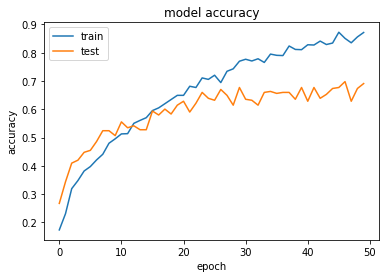

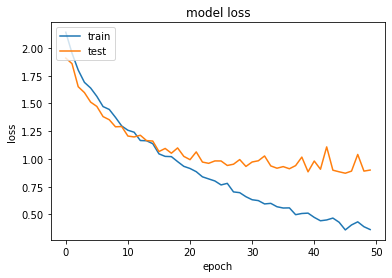

In [ ]:
# Accuracy Plot       
plt.plot(cnn_2.history['accuracy'])
plt.plot(cnn_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# Loss Plot
plt.plot(cnn_2.history['loss'])
plt.plot(cnn_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

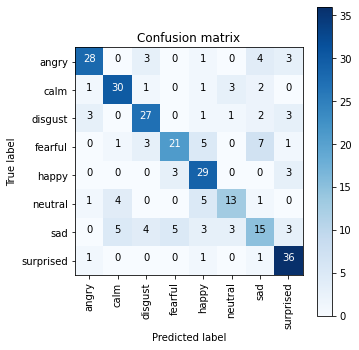

In [ ]:
y_pred = model_2.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.82      0.72      0.77        39
        calm       0.75      0.79      0.77        38
     disgust       0.71      0.73      0.72        37
     fearful       0.72      0.55      0.63        38
       happy       0.63      0.83      0.72        35
     neutral       0.65      0.54      0.59        24
         sad       0.47      0.39      0.43        38
   surprised       0.73      0.92      0.82        39

    accuracy                           0.69       288
   macro avg       0.69      0.68      0.68       288
weighted avg       0.69      0.69      0.68       288



# **5.2 Transfer Learning**

In [ ]:
# READ IN AUDIO FILES 
audio = "/content/drive/MyDrive/IT890/RAVDESS/audio_speech_actors_01-24"

In [ ]:
dicts={'01' : 'neutral', '02' : 'calm', '03' : 'happy', '04' : 'sad', '05' : 'angry', '06' : 'fearful', '07' : 'disgust', '08' : 'surprised'}

In [ ]:
path_main=audio

In [ ]:
folders_main=os.listdir(path_main)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Images, Labels, test_size=0.2, random_state=22, stratify=Labels)



In [ ]:
from keras.utils import np_utils, to_categorical

lb = LabelEncoder()



X_train = np.array(X_train, dtype=np.float32)

X_test = np.array(X_test, dtype=np.float32)

X_train /= 255
X_test /= 255


y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(lb.classes_)

['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']


# **5.2.1 VGG16**

In [ ]:
from keras import applications

model = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (224, 224, 3),pooling='avg')

In [ ]:
# freezing the layers 
for layer in model.layers:
    layer.trainable = False


#Adding additional Layers 

x = model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(8, activation='softmax')(x)

In [ ]:
predictions = Dense(8, activation="softmax")(x)

# creating the final model 
model_final = Model(inputs = model.input, outputs = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [ ]:
model_final.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 75, 75, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 37, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 18, 128)       0   

In [ ]:
# FUNCTION TO STRETCH THE SOUND
def stretch(y, rate=0.8):
    data = librosa.effects.time_stretch(y, rate)
    return data

In [ ]:
fname = audio + '/Actor_09/03-01-04-02-02-02-09.wav'  
y, sr = librosa.load(fname)
yt,_=librosa.effects.trim(y)

In [ ]:
y=yt

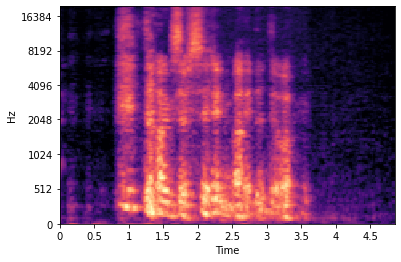

In [ ]:
y= stretch(y)
y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
db_spec = librosa.power_to_db(y)
librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');

/content/drive/MyDrive/IT890/RAVDESS/audio_speech_actors_01-24/Actor_22
22 sad
22 sad
22 happy
22 angry
22 calm
22 angry
22 neutral
22 sad
22 neutral
22 angry
22 sad
22 angry
22 sad
22 happy
22 fearful
22 surprised
22 disgust
22 disgust
22 disgust
22 angry
22 happy
22 fearful
22 disgust
22 happy
22 disgust
22 disgust
22 disgust
22 sad
22 happy
22 calm
22 fearful
22 fearful
22 calm
22 neutral
22 calm
22 calm
22 fearful
22 sad
22 happy
22 calm
22 calm
22 sad
22 happy
22 angry
22 angry
22 happy
22 calm
22 fearful
22 angry
22 neutral
22 disgust
22 fearful
22 fearful
22 surprised
22 surprised
22 surprised
22 surprised
22 surprised
22 surprised
22 surprised
/content/drive/MyDrive/IT890/RAVDESS/audio_speech_actors_01-24/Actor_23
23 disgust
23 happy
23 sad
23 fearful
23 fearful
23 angry
23 calm
23 happy
23 sad
23 calm
23 happy
23 fearful
23 disgust
23 neutral
23 calm
23 sad
23 happy
23 angry
23 fearful
23 calm
23 angry
23 sad
23 disgust
23 happy
23 angry
23 sad
23 sad
23 calm
23 disgust
23 neu

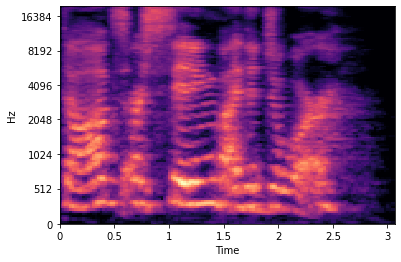

In [ ]:
import re # 5.88 hrs
counter=0
for folders in folders_main :
    path_in='/content/drive/MyDrive/IT890/RAVDESS/audio_speech_actors_01-24/{0}'.format(folders)
    print(path_in)
    files_sub=os.listdir(path_in)
    for file in files_sub :
        numbers = re.findall('\d+',file)
        emotion=dicts[numbers[2]]
        print (numbers[6],emotion)
        path_save='/content/drive/MyDrive/IT890/RAVDESS/stretch/{0}/{1}.jpeg'.format(emotion,file)
        path_load='{0}/{1}'.format(path_in,file)
        y, sr = librosa.load(path_load)
        yt,_=librosa.effects.trim(y)
        y=yt
        y= stretch(y)
        y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(y)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)

In [ ]:
import glob
angry = glob.glob('/content/drive/MyDrive/IT890/RAVDESS/stretch/angry/*.*')
calm = glob.glob('/content/drive/MyDrive/IT890/RAVDESS/stretch/calm/*.*')
disgust = glob.glob('/content/drive/MyDrive/IT890/RAVDESS/stretch/disgust/*.*')
fearful = glob.glob('/content/drive/MyDrive/IT890/RAVDESS/stretch/fearful/*.*')
happy = glob.glob('/content/drive/MyDrive/IT890/RAVDESS/stretch/happy/*.*')
neutral = glob.glob('/content/drive/MyDrive/IT890/RAVDESS/stretch/neutral/*.*')
sad = glob.glob('/content/drive/MyDrive/IT890/RAVDESS/stretch/sad/*.*')
surprised = glob.glob('/content/drive/MyDrive/IT890/RAVDESS/stretch/surprised/*.*')

In [ ]:
data = []
labels = []

for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Angry')
for i in calm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Calm')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Disgust')
for i in fearful:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Fearful')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Sad')
for i in surprised:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Surprised')

data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2,random_state=22, stratify=labels)



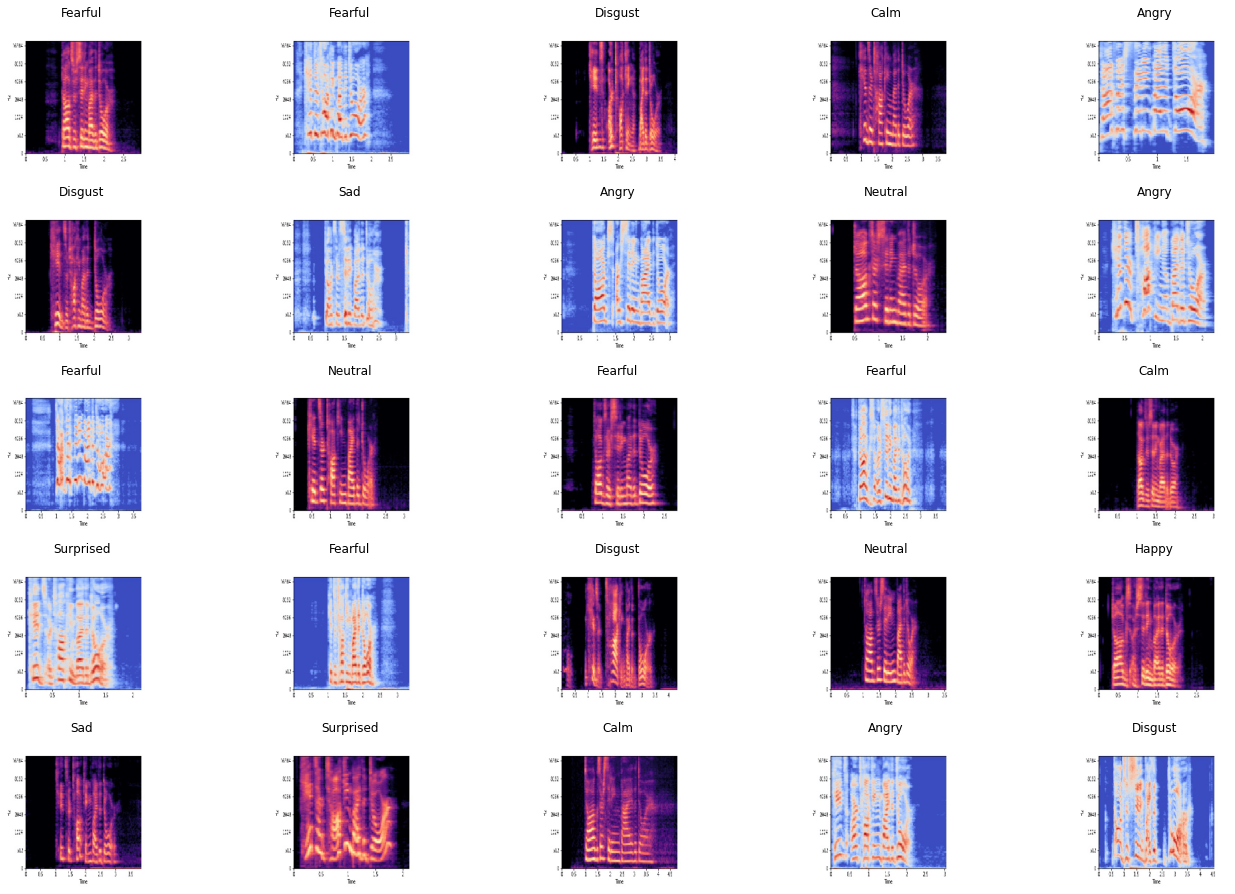

In [ ]:
def get_classlabel(class_code):
    labels = {'Angry':'Angry', 'Calm':'Calm', 'Disgust':'Disgust', 'Fearful':'Fearful', 'Happy':'Happy', 'Neutral':'Neutral','Sad':'Sad','Surprised':'Surprised'}
    
    return labels[class_code]

f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(train_data))
        ax[i,j].imshow(train_data[rnd_number])
        ax[i,j].set_title(get_classlabel(train_labels[rnd_number]))
        ax[i,j].axis('off')

In [ ]:
def get_images(directory):
    Images = []
    Labels = []  
    label = 0
    
    for labels in os.listdir(directory): 
        if labels == 'angry': 
            label = 'angry'
        elif labels == 'calm':
            label = 'calm'
        elif labels == 'disgust':
            label = 'disgust'
        elif labels == 'fearful':
            label = 'fearful'
        elif labels == 'happy':
            label = 'happy'
        elif labels == 'neutral':
            label = 'neutral'
        elif labels == 'sad':
            label = 'sad'
        elif labels == 'surprised':
            label = 'surprised'
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(224,224)) #Resize the image, Some images are different sizes. 
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=200) #Shuffle the dataset prepared.

def get_classlabel(class_code):
    labels = {'angry':'angry', 'calm':'calm', 'disgust':'disgust', 'fearful':'fearful', 'happy':'happy', 'neutral':'neutral','sad':'sad','surprised':'surprised'}
    
    return labels[class_code]

In [ ]:
Images, Labels = get_images('/content/drive/MyDrive/IT890/RAVDESS/stretch/') #Extract the training images from the folders.


In [ ]:
train_datagen = ImageDataGenerator(
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   width_shift_range=0.15)
 
 
 
train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=1)

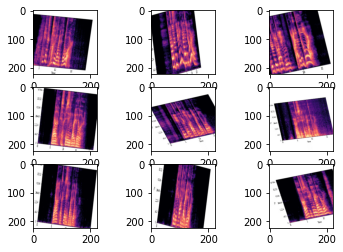

In [ ]:
img_rows, img_cols = 224, 224
 
for x, y in train_datagen.flow(X_train, y_train, batch_size=64):
    # sample of the first 9 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(x[i].reshape(img_rows, img_cols, 3))
    # show the plot
    pyplot.show()
    break

In [ ]:
from tensorflow.keras import layers, models, Model, optimizers

learning_rate= 5e-5
model_3.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

vgg_2 = Model_3.fit_generator(train_generator,
                    validation_data=(X_test,y_test),
                    epochs=80,
                    callbacks=[lr_reduce,checkpoint])
                    shuffle=True)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/80
1152/1152 [==============================] - 32s 21ms/step - loss: 2.1360 - accuracy: 0.1562 - val_loss: 1.9150 - val_accuracy: 0.2812

Epoch 00001: val_accuracy improved from -inf to 0.28125, saving model to ftzq.h15
INFO:tensorflow:Assets written to: ftzq.h15/assets
Epoch 2/80
1152/1152 [==============================] - 23s 20ms/step - loss: 1.8515 - accuracy: 0.2900 - val_loss: 1.6185 - val_accuracy: 0.3507

Epoch 00002: val_accuracy improved from 0.28125 to 0.35069, saving model to ftzq.h15
INFO:tensorflow:Assets written to: ftzq.h15/assets
Epoch 3/80
1152/1152 [==============================] - 23s 20ms/step - loss: 1.6946 - accuracy: 0.3267 - val_loss: 1.3941 - val_accuracy: 0.4375

Epoch 00003: val_accuracy improved from 0.35069 to 0.43750, saving model to ftzq.h15
INFO:tensorflow:Assets written to: ftzq.h15/assets
Epoch 4/80
1152/1152 [==============================] - 24s 21ms/step - loss: 1.4707 - accuracy: 0.4336 - val_loss: 1.3001 - val_accuracy: 0.4896

Epoch 0

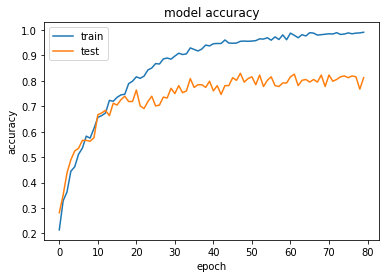

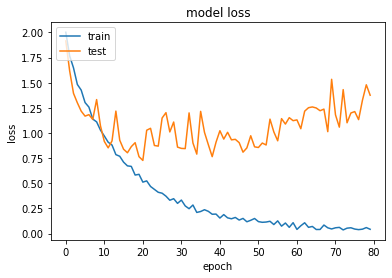

In [ ]:
# Accuracy Plot
plt.plot(vgg_2.history['accuracy'])
plt.plot(vgg_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Loss PLot
plt.plot(vgg_2.history['loss'])
plt.plot(vgg_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

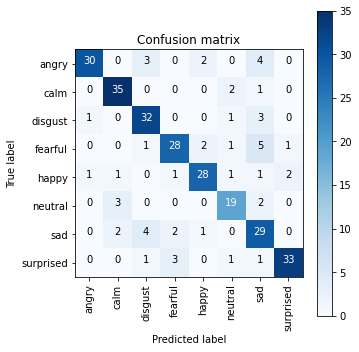

In [ ]:
y_pred = model_3.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.94      0.77      0.85        39
        calm       0.85      0.92      0.89        38
     disgust       0.78      0.86      0.82        37
     fearful       0.82      0.74      0.78        38
       happy       0.85      0.80      0.82        35
     neutral       0.76      0.79      0.78        24
         sad       0.63      0.76      0.69        38
   surprised       0.92      0.85      0.88        39

    accuracy                           0.81       288
   macro avg       0.82      0.81      0.81       288
weighted avg       0.82      0.81      0.81       288

